In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("menu.csv")

In [3]:
data.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


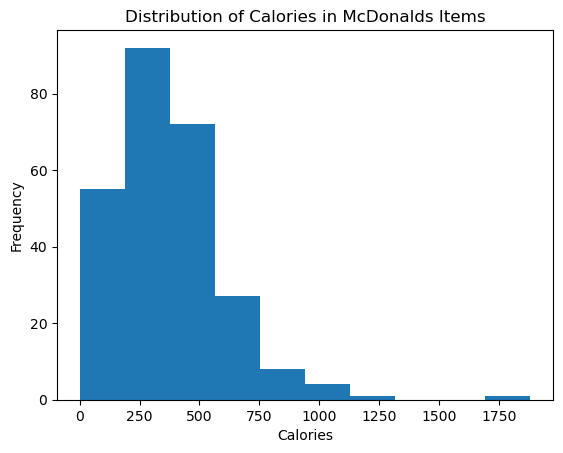

In [5]:
# 1a) Plot the histogram of the Calfoires. Comment on the datatype of the features
plt.hist(data['Calories'])
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.title("Distribution of Calories in McDonalds Items")
plt.show()

In [122]:
data['Calories'].dtype

dtype('int64')

Text(0.5, 1.0, 'Correlation Heatmap Between Features & Calories')

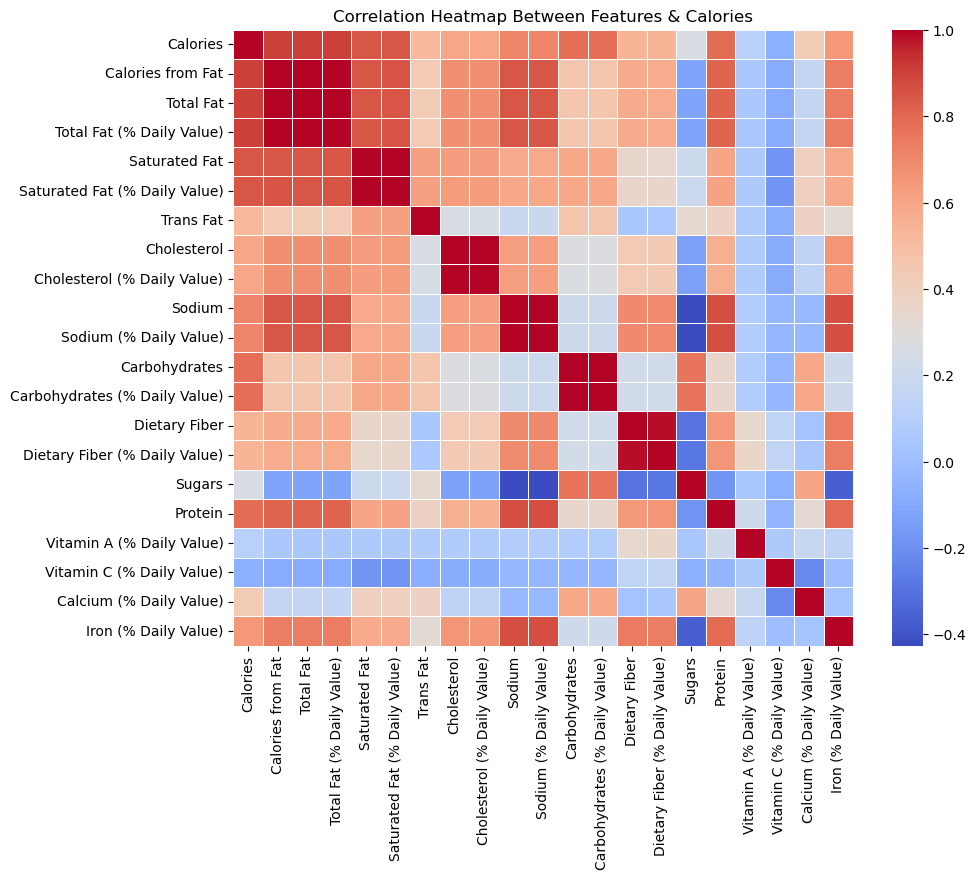

In [67]:
# 1b) PLot the correlation heatmap between features and Calories

# get rid of the categorical items
numerical_data = data.drop(columns = ['Category', 'Item', 'Serving Size'])

# plot sns heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(numerical_data.corr(), cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title("Correlation Heatmap Between Features & Calories")

In [68]:
# 1c) list the features whcih have the second and third largest positive correlation w/Calories.

calorie_correlation = numerical_data.corr().loc[['Calories'], :]
calorie_correlation.sort_values(by = 'Calories', ascending = False)

# results -> ['Calories from Fat', 'Total Fat']

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Calories,1.0,0.904588,0.904409,0.904123,0.845564,0.847631,0.522441,0.596399,0.595208,0.712309,...,0.781539,0.781242,0.538894,0.540014,0.259598,0.787847,0.108844,-0.068747,0.428426,0.643552


In [69]:
# 1d) List all features that have nagetive correlation w/Calories

calorie_correlation.loc["Calories"][calorie_correlation.loc["Calories"] < 0]

# Result -> 'Vitamin C (% Daily Value)'

Vitamin C (% Daily Value)   -0.068747
Name: Calories, dtype: float64

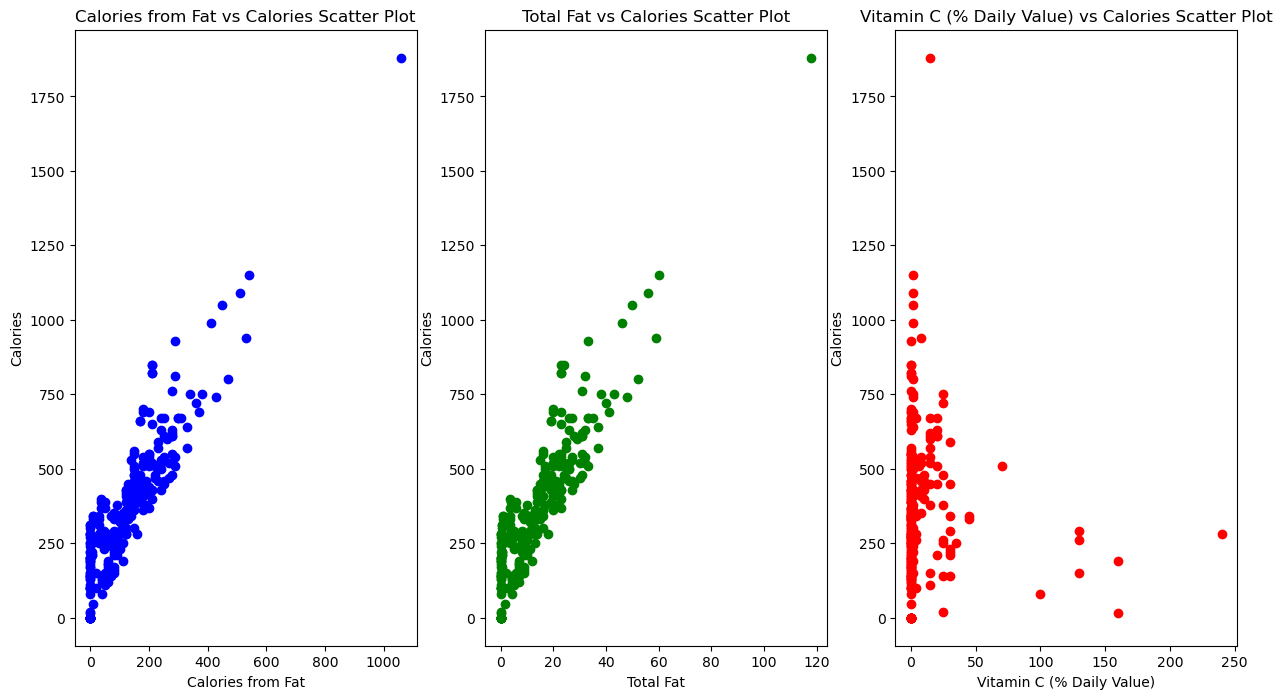

In [129]:
# 2a) Plot the scatter plot for 'features vs Calories' for all features found in 1(c) and 1(d)

colors = {
    "Calories from Fat": "blue",
    "Total Fat": "green",
    "Vitamin C (% Daily Value)": "red"
}

fig, axes = plt.subplots(1, 3, figsize = (15, 8))

for ax, label in zip(axes, colors.keys()):
    ax.scatter(data[label], data["Calories"], color = colors[label])
    ax.set_xlabel(label)
    ax.set_ylabel("Calories")
    ax.set_title(f"{label} vs Calories Scatter Plot")

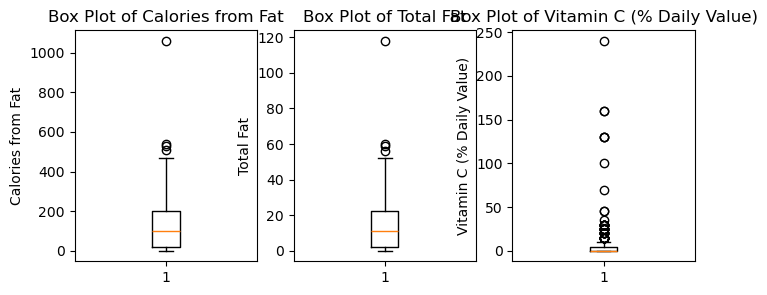

In [139]:
# 2b) Plot the box plot for features in 1c and 1d

fig, axes = plt.subplots(1, 3, figsize = (8, 3))

for ax, label in zip(axes, colors.keys()):
    ax.boxplot(data[label])
    ax.set_ylabel(label)
    ax.set_title(f"Box Plot of {label}")
    

In [77]:
# 3a) Report the median and standard deviation for all numerical features

median_std_data = numerical_data.describe().loc[['std', '50%']]
median_std_data

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000


In [143]:
print(median_std_data.to_string())

       Calories  Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  Saturated Fat (% Daily Value)  Trans Fat  Cholesterol  Cholesterol (% Daily Value)      Sodium  Sodium (% Daily Value)  Carbohydrates  Carbohydrates (% Daily Value)  Dietary Fiber  Dietary Fiber (% Daily Value)     Sugars    Protein  Vitamin A (% Daily Value)  Vitamin C (% Daily Value)  Calcium (% Daily Value)  Iron (% Daily Value)
std  240.269886         127.875914  14.205998                  21.885199       5.321873                      26.639209   0.429133    87.269257                    29.091653  577.026323               24.034954      28.252232                       9.419544       1.567717                       6.307057  28.679797  11.426146                  24.366381                  26.345542                17.019953              8.723263
50%  340.000000         100.000000  11.000000                  17.000000       5.000000                      24.000000   0.000000    35.000000            

In [82]:
median_std_data.loc["50%", "Calories"]

340.0

In [88]:
# 3b) Write code to replace outliers of all numerical fetures in a with NaN

def replace_outliers(df, median_std_data):
    for column in df.columns:
        median = median_std_data.loc['50%', column]
        std = median_std_data.loc['std', column]
        bounds = [median - 3 * std, median + 3 * std]
        df[column] = df[column].where((df[column] >= bounds[0]) & (df[column] <= bounds[1]), np.nan)
    return df

cleaned_data = replace_outliers(numerical_data.copy(), median_std_data)
cleaned_data.describe().loc[['std', '50%']]

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
std,211.941065,106.047296,11.783668,18.124484,5.321873,26.639209,0.336717,57.881052,18.591678,503.284771,...,25.472121,8.492925,1.322284,5.651278,26.457805,10.276582,12.480365,9.719391,17.019953,8.113066
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,30.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.000000,12.000000,8.000000,0.000000,20.000000,4.000000


In [144]:
cleaned_data.isna().sum()

Calories                         3
Calories from Fat                4
Total Fat                        4
Total Fat (% Daily Value)        4
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        9
Cholesterol                      5
Cholesterol (% Daily Value)      6
Sodium                           5
Sodium (% Daily Value)           5
Carbohydrates                    5
Carbohydrates (% Daily Value)    5
Dietary Fiber                    8
Dietary Fiber (% Daily Value)    5
Sugars                           4
Protein                          2
Vitamin A (% Daily Value)        6
Vitamin C (% Daily Value)        7
Calcium (% Daily Value)          0
Iron (% Daily Value)             3
dtype: int64

In [155]:
# 3c) WRite code to replace missing values with mean values. Report median and standard deviation.
means = cleaned_data.describe().loc[['mean']]

def replace_nans(df):
    for column in df.columns:
        df[column] = df[column].fillna(means[column].values[0])
    return df


replaced_data = replace_nans(cleaned_data.copy())
replaced_data.describe().loc[["std", "50%"]]

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
std,210.710032,105.225212,11.692321,17.983982,5.321873,26.639209,0.330815,57.319632,18.375069,498.403136,...,25.225053,8.410548,1.301702,5.596463,26.252703,10.236827,12.334957,9.587148,17.019953,8.065942
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000


In [158]:
print(replaced_data.describe().loc[["std", "50%"]].to_string())

       Calories  Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  Saturated Fat (% Daily Value)  Trans Fat  Cholesterol  Cholesterol (% Daily Value)      Sodium  Sodium (% Daily Value)  Carbohydrates  Carbohydrates (% Daily Value)  Dietary Fiber  Dietary Fiber (% Daily Value)     Sugars    Protein  Vitamin A (% Daily Value)  Vitamin C (% Daily Value)  Calcium (% Daily Value)  Iron (% Daily Value)
std  210.710032         105.225212  11.692321                  17.983982       5.321873                      26.639209   0.330815    57.319632                    18.375069  498.403136               20.754357      25.225053                       8.410548       1.301702                       5.596463  26.252703  10.236827                  12.334957                   9.587148                17.019953              8.065942
50%  340.000000         100.000000  11.000000                  17.000000       5.000000                      24.000000   0.000000    35.000000            

In [91]:
from sklearn.linear_model import LinearRegression

# 4a) Train a predictor to predict the Calories as follows:
x = data[['Carbohydrates', 'Protein', 'Total Fat']]
y = data['Calories']

model = LinearRegression()
model.fit(x, y)

model_coef = model.coef_
model_int = model.intercept_
print(f"Model Coefficients: {model_coef}\nModel Intercept: {model_int}")

Model Coefficients: [3.97896903 4.04524858 9.01862206]
Model Intercept: -1.8292919301434836


In [93]:
# 4b) Train another predictor to predict Calories as follows:

x = data[["Total Fat"]]
y = data["Calories"]

model2 = LinearRegression()
model2.fit(x, y)

model2_coef = model2.coef_
model2_int = model2.intercept_
print(f"Model2 Coefficients: {model2_coef}\nModel2 Intercept: {model2_int}")

Model2 Coefficients: [15.29651666]
Model2 Intercept: 151.58818902493147


In [119]:
# 4c) Split the data into 90% training and 10% for testing. Train using all features. What is the model's MSE on training/test sets.

numerical_data = numerical_data.copy()
train_data, test_data = numerical_data.iloc[:int(0.9 * numerical_data.shape[0])], numerical_data.iloc[int(0.9 * numerical_data.shape[0]): ]

In [121]:
from sklearn.metrics import mean_squared_error

train_X, train_Y = train_data.drop(columns = ["Calories"]), train_data["Calories"]
test_X, test_Y = test_data.drop(columns = ["Calories"]), test_data["Calories"]

finalModel = LinearRegression()
finalModel.fit(train_X, train_Y)

train_pred = finalModel.predict(train_X)
training_mse = mean_squared_error(train_Y, train_pred)

test_pred = finalModel.predict(test_X)
test_mse = mean_squared_error(test_Y, test_pred)
print(f"Training MSE: {training_mse}\nTest MSE: {test_mse}")

Training MSE: 18.915641610754008
Test MSE: 60.196732002659665


In [ ]:
# 5a) Express odds to predicitng label 1 in terms of weights and features